In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("RIAU.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  344 non-null    datetime64[ns]
 1   Tn       341 non-null    float64       
 2   Tx       341 non-null    float64       
 3   Tavg     341 non-null    float64       
 4   RH_avg   341 non-null    float64       
 5   RR       335 non-null    float64       
 6   ss       330 non-null    float64       
 7   ff_x     342 non-null    float64       
 8   ddd_x    342 non-null    float64       
 9   ff_avg   342 non-null    float64       
 10  ddd_car  342 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 29.7+ KB


<ipython-input-5-53fc07246494>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [6]:
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1 = df1.sort_values(by=["Tanggal"]).reset_index()

In [7]:
df1.duplicated().sum()

0

In [8]:
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [9]:
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [10]:
mrr = df1['RR'].mean()
mavg = (df1['Tn'] + df1['Tx'])/2
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [11]:
df1.head(1000)

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.2,31.0,48.200000,26.6
1,1,64,2023-01-02,22.6,32.3,0.000000,26.2
2,2,31,2023-01-02,22.6,32.3,0.000000,26.2
3,3,92,2023-01-03,23.4,26.5,0.000000,25.1
4,4,32,2023-01-03,23.4,26.5,0.000000,25.1
...,...,...,...,...,...,...,...
339,339,166,2023-12-07,23.7,32.0,0.000000,27.6
340,340,230,2023-12-08,22.0,30.4,0.000000,25.9
341,341,262,2023-12-09,22.0,35.0,8.769851,27.5
342,342,323,2023-12-10,22.8,33.5,0.000000,27.5


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 190, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 178, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 6361, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4817, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert level_0, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 202, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  

<Axes: >

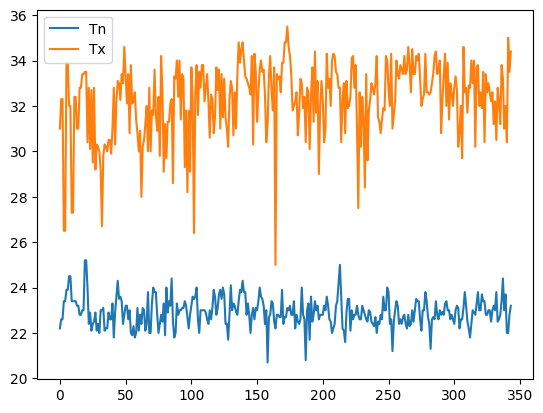

In [12]:
df1[['Tn', 'Tx']].plot()

<Axes: >

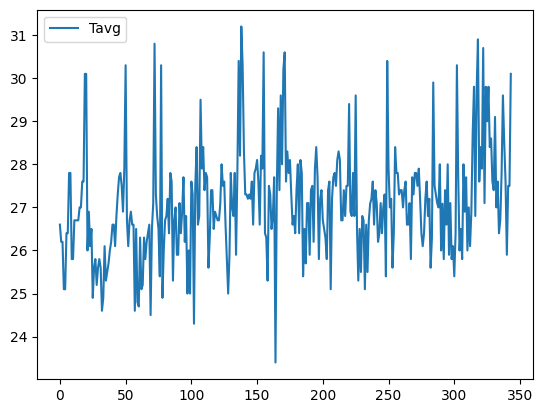

In [13]:
df1[['Tavg']].plot()

<Axes: >

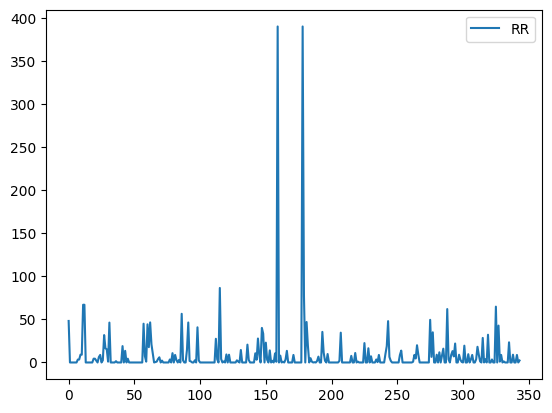

In [14]:
df1[['RR']].plot()

In [15]:
for i, row in df1.iterrows():
  if row['RR'] > 200 :
    print(row)

level_0                    159
index                       98
Tanggal    2023-06-04 00:00:00
Tn                        22.7
Tx                        33.3
RR                       390.0
Tavg                      27.5
Name: 159, dtype: object
level_0                    178
index                      147
Tanggal    2023-06-24 00:00:00
Tn                        23.4
Tx                        32.0
RR                       390.0
Tavg                      26.8
Name: 178, dtype: object


In [16]:
for i, row in df1.iterrows():
  if row['RR'] > 300 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

In [17]:
df1.head(1000)

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.2,31.0,48.200000,26.6
1,1,64,2023-01-02,22.6,32.3,0.000000,26.2
2,2,31,2023-01-02,22.6,32.3,0.000000,26.2
3,3,92,2023-01-03,23.4,26.5,0.000000,25.1
4,4,32,2023-01-03,23.4,26.5,0.000000,25.1
...,...,...,...,...,...,...,...
339,339,166,2023-12-07,23.7,32.0,0.000000,27.6
340,340,230,2023-12-08,22.0,30.4,0.000000,25.9
341,341,262,2023-12-09,22.0,35.0,8.769851,27.5
342,342,323,2023-12-10,22.8,33.5,0.000000,27.5


<Axes: >

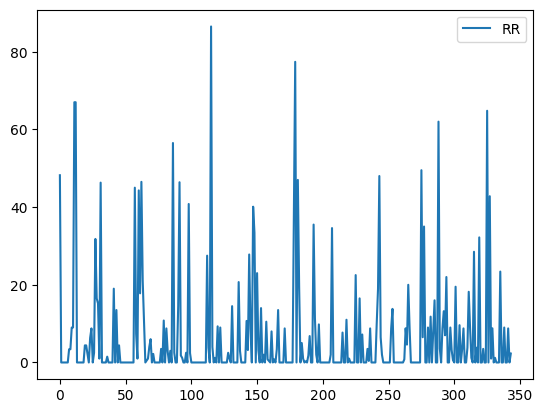

In [18]:
df1[['RR']].plot()

In [19]:
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.2,31.0,48.200000,26.6,32.3,26.2,0.000000
1,1,64,2023-01-02,22.6,32.3,0.000000,26.2,32.3,26.2,0.000000
2,2,31,2023-01-02,22.6,32.3,0.000000,26.2,26.5,25.1,0.000000
3,3,92,2023-01-03,23.4,26.5,0.000000,25.1,26.5,25.1,0.000000
4,4,32,2023-01-03,23.4,26.5,0.000000,25.1,33.9,26.4,0.000000
...,...,...,...,...,...,...,...,...,...,...
339,339,166,2023-12-07,23.7,32.0,0.000000,27.6,30.4,25.9,0.000000
340,340,230,2023-12-08,22.0,30.4,0.000000,25.9,35.0,27.5,8.769851
341,341,262,2023-12-09,22.0,35.0,8.769851,27.5,33.5,27.5,0.000000
342,342,323,2023-12-10,22.8,33.5,0.000000,27.5,34.4,30.1,2.300000


<Axes: >

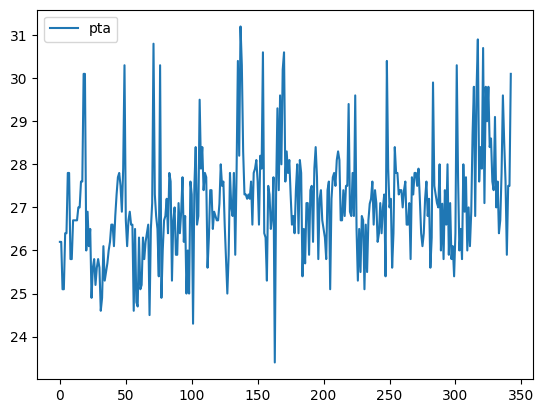

In [20]:
df1[['pta']].plot()

<Axes: >

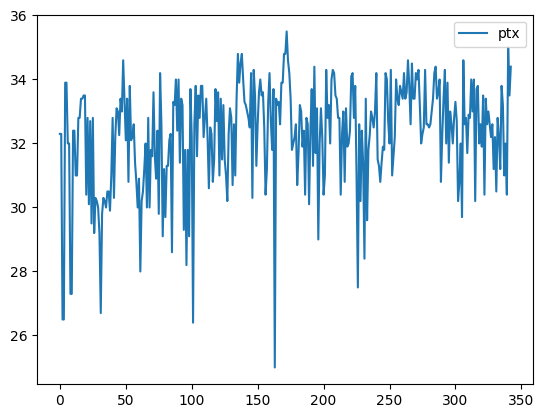

In [21]:
df1[['ptx']].plot()

<Axes: >

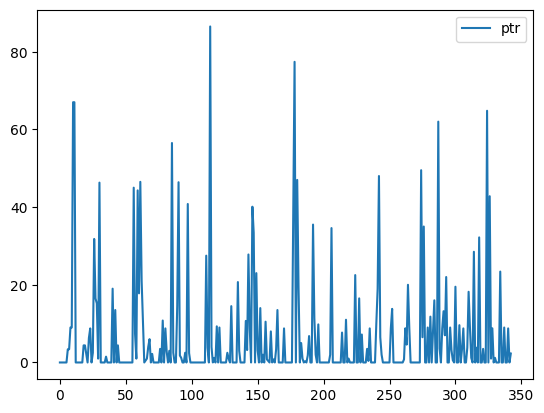

In [22]:
df1[['ptr']].plot()

In [23]:
df1 = df1.iloc[:-1, :].copy()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.2,31.0,48.200000,26.6,32.3,26.2,0.000000
1,1,64,2023-01-02,22.6,32.3,0.000000,26.2,32.3,26.2,0.000000
2,2,31,2023-01-02,22.6,32.3,0.000000,26.2,26.5,25.1,0.000000
3,3,92,2023-01-03,23.4,26.5,0.000000,25.1,26.5,25.1,0.000000
4,4,32,2023-01-03,23.4,26.5,0.000000,25.1,33.9,26.4,0.000000
...,...,...,...,...,...,...,...,...,...,...
338,338,135,2023-12-06,23.0,31.0,9.000000,28.5,32.0,27.6,0.000000
339,339,166,2023-12-07,23.7,32.0,0.000000,27.6,30.4,25.9,0.000000
340,340,230,2023-12-08,22.0,30.4,0.000000,25.9,35.0,27.5,8.769851
341,341,262,2023-12-09,22.0,35.0,8.769851,27.5,33.5,27.5,0.000000


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X = df1.drop(['ptx', 'pta', 'Tanggal', 'index'], axis=1)
y = df1["pta"]

In [26]:
X1 = df1[["Tavg", "RR"]]
y1 = df1["pta"]

In [27]:
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
ptx        0
pta        0
ptr        0
dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [29]:
X_train.isnull().sum()

level_0    0
Tn         0
Tx         0
RR         0
Tavg       0
ptr        0
dtype: int64

In [30]:
rf = RandomForestRegressor(n_estimators=100)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
pred = rf.predict(X_test)
pred

array([27.236     , 27.198     , 27.15210264, 27.02685044, 27.34370088,
       26.929     , 27.072     , 27.10585044, 27.016     , 27.051     ,
       27.853     , 26.908     , 27.358     , 27.568     , 26.53      ,
       27.394     , 27.18270088, 27.202     , 27.20085044, 27.389     ,
       27.02870088, 28.105     , 27.0542522 , 26.783     , 27.04685044,
       27.453     , 27.407     , 27.04185044, 27.365     , 26.878     ,
       27.072     , 27.076     , 27.16670088, 27.563     , 27.25585044,
       26.844     , 27.17155132, 26.775     , 26.931     , 26.82      ,
       27.759     , 27.186     , 27.097     , 26.81785044, 27.983     ,
       26.946     , 27.555     , 27.617     , 26.994     , 27.004     ,
       27.849     , 27.176     , 27.594     , 27.159     , 27.129     ,
       26.796     , 27.197     , 27.531     , 27.07      , 26.792     ,
       27.162     , 26.93270088, 27.58485044, 27.401     , 27.115     ,
       27.377     , 27.266     , 26.921     , 27.883     ])

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
mae

1.0522732372816492

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
pred1 = lr.predict(X_test)
pred1

array([27.1411062 , 26.81114727, 27.06696954, 27.21024876, 27.85908698,
       27.57704616, 27.27974218, 27.21029535, 26.70132778, 27.22068233,
       27.72332974, 27.5029658 , 27.78463489, 27.17489772, 27.21034222,
       27.71709289, 27.01933597, 27.30960529, 27.23460073, 27.64370326,
       27.38317887, 27.7319826 , 27.13941759, 27.35657601, 27.2284132 ,
       27.16200722, 26.99977099, 27.39921379, 27.99648963, 27.30307097,
       26.88758647, 27.21536185, 26.84300956, 27.83320481, 27.7077457 ,
       27.64698273, 27.01277156, 27.18878992, 27.00840879, 27.45302447,
       27.63700177, 27.91294875, 27.14978013, 28.06976293, 28.24774383,
       27.42720174, 27.70740372, 27.75487004, 28.22773076, 27.4217804 ,
       27.61612589, 27.53125219, 27.74516928, 27.5786791 , 27.51858543,
       27.58919738, 27.49845738, 27.78270052, 27.55580075, 27.50192325,
       27.19072741, 27.2263025 , 27.90395115, 28.3385359 , 27.56488081,
       27.78219079, 26.84350353, 27.56233255, 27.65834818])

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.994254178658897

In [37]:
predpred = pd.DataFrame(pred1).set_index(X_test['level_0'])
predpred

,0
level_0,
274,27.141106
275,26.811147
276,27.066970
277,27.210249
278,27.859087
...,...
338,27.564881
339,27.782191
340,26.843504


In [38]:
kan = pd.concat([df1['Tavg'], predpred], axis=1)
kan.sort_index(False).head(1000)


<ipython-input-38-0ecea4ef1330>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.6,NaN
1,26.2,NaN
2,26.2,NaN
3,25.1,NaN
4,25.1,NaN
...,...,...
338,28.5,27.564881
339,27.6,27.782191
340,25.9,26.843504
341,27.5,27.562333


<Axes: >

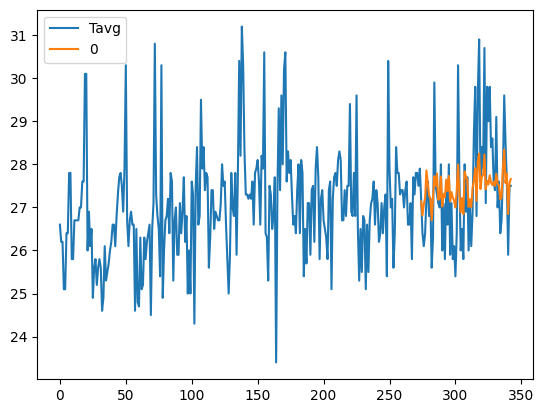

In [39]:
kan.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
kan.to_json('prediksi')